In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mth

In [74]:
df = pd.read_csv('DATA_P4/data_final.csv')

In [75]:
df.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491


In [76]:
df['mois_annee']= df.date.str.slice(0, 7)
df['age']= 2022-df['birth']
df.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,mois_annee,age
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,2021-04,36.0
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,2021-11,62.0
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742,2021-04,51.0
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147,2021-10,35.0
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491,2021-12,18.0


In [77]:
df['mois_annee']= pd.to_datetime(df['mois_annee'])
df['annee'] = df['mois_annee'].dt.year 
df['mois'] = df['mois_annee'].dt.month
df.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,mois_annee,age,annee,mois
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,2021-04-01,36.0,2021,4
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,2021-11-01,62.0,2021,11
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742,2021-04-01,51.0,2021,4
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147,2021-10-01,35.0,2021,10
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491,2021-12-01,18.0,2021,12


## Analyse univariée 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   price       336816 non-null  float64       
 2   categ       336816 non-null  float64       
 3   client_id   336816 non-null  object        
 4   sex         336816 non-null  object        
 5   birth       336816 non-null  float64       
 6   date        336816 non-null  object        
 7   session_id  336816 non-null  object        
 8   mois_annee  336816 non-null  datetime64[ns]
 9   age         336816 non-null  float64       
 10  annee       336816 non-null  int64         
 11  mois        336816 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 30.8+ MB


## Analyse démographique

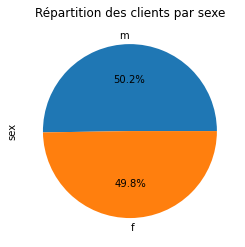

In [79]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des clients par sexe')
plt.savefig('clt_sex.png')
plt.show()

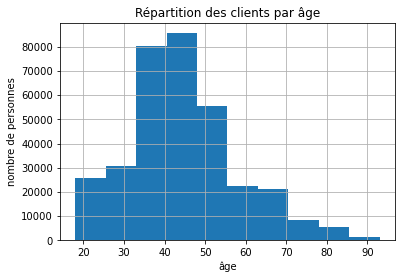

In [80]:
df['age'].hist()
plt.ylabel('nombre de personnes')
plt.xlabel('âge')
plt.title('Répartition des clients par âge')
plt.savefig('clt_age.png')
plt.show()

### Analyse du CA 

In [81]:
ca = df['price'].sum()
print(f"l'entreprise a réalisé un chiffre d'affaires total de  : {ca}")

l'entreprise a réalisé un chiffre d'affaires total de  : 5797673.248771481


In [82]:
ca_mois = df[['mois_annee', 'price']].groupby(by='mois_annee').sum()
ca_mois.reset_index()

,mois_annee,price
0,2021-03-01,479407.751446
1,2021-04-01,473129.620027
2,2021-05-01,489453.035730
3,2021-06-01,481332.390014
4,2021-07-01,480941.202865
5,2021-08-01,479400.911446
6,2021-09-01,502898.908595
7,2021-10-01,319234.410014
8,2021-11-01,512996.527162
9,2021-12-01,523012.130013


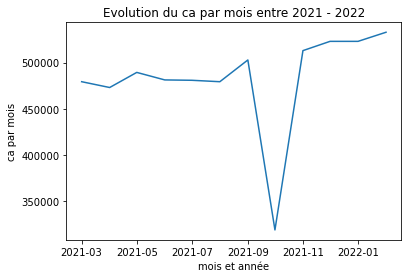

In [83]:
plt.plot(ca_mois)
plt.xlabel('mois et année')
plt.ylabel('ca par mois')
plt.title('Evolution du ca par mois entre 2021 - 2022')
plt.savefig('ca_mois.png')
plt.show()

In [84]:
ca_age= df[['age', 'price']].groupby(by='age').sum().reset_index()
ca_age.head()

,age,price
0,18.0,295387.980000
1,19.0,88461.390000
2,20.0,89920.655716
3,21.0,84881.480000
4,22.0,80110.555716


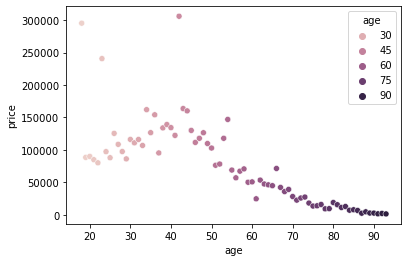

In [85]:
sns.scatterplot(data=ca_age, x="age", y="price", hue="age")
plt.savefig('ca_age.png')

In [86]:
ca_sex = df[['sex', 'price']].groupby(by='sex').mean().reset_index()
ca_sex.head()

,sex,price
0,f,17.065552
1,m,17.359348


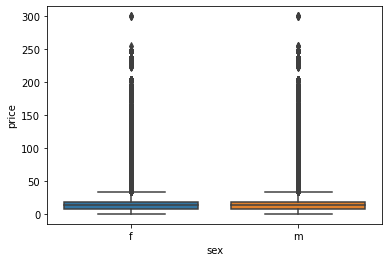

In [87]:
sns.boxplot(x="sex", y="price", data=df[['sex','price']])
plt.savefig('sex_ca.png')

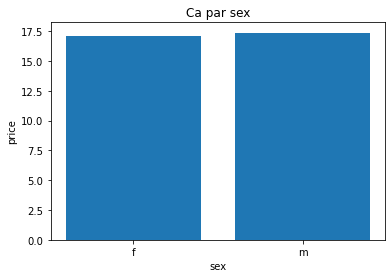

In [88]:
plt.bar(ca_sex['sex'], ca_sex['price'])
plt.xlabel('sex')
plt.ylabel('price')
plt.title('Ca par sex')
plt.savefig('sex_prix.png')
plt.show()

In [89]:
ca_session = df.groupby(by='session_id').mean()['price'].reset_index()
ca_session

,session_id,price
0,s_1,11.990000
1,s_10,26.990000
2,s_100,16.860000
3,s_1000,9.805000
4,s_10000,13.830000
...,...,...
169189,s_99994,9.640000
169190,s_99995,19.840000
169191,s_99996,14.067500
169192,s_99997,6.990000


C:\Users\sfakh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


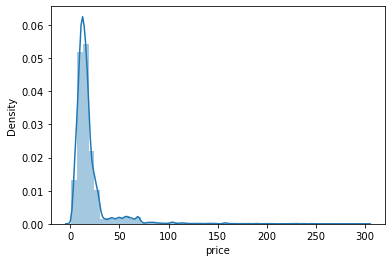

In [90]:
sns.distplot(ca_session['price'])
plt.savefig('session_ca.png')

Le graphique ci-dessous shématise la distribution des prix par session d'achat. Plus le nombre de session augmente , plus le panier augmente. 

## Courbe de Lorenz 

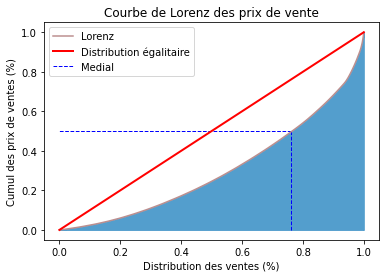

In [91]:
#Courbe de Lorenz sur la variables des prix
price = df['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lor_ca = np.cumsum(np.sort(price)) / price.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lor_ca)), lor_ca, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lor_ca)) ,lor_ca , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")
plt.savefig('courbe_lorenz.png')
plt.show()

In [92]:
#Aire sous la courbe de Lorenz
aire_ss_courbe_price = lor_ca[:-1].sum()/len(lor_ca) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_price 
gini_price = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_price))

L'indice de Gini est égal à 0.39


## CA PAR CATEGORIE

In [93]:
ca_categ = df.groupby(by='categ').sum()['price']
ca_categ

categ
0.0    2.230818e+06
1.0    2.247384e+06
2.0    1.319471e+06
Name: price, dtype: float64

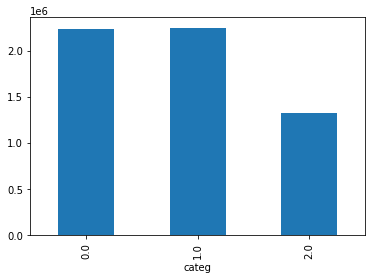

In [94]:
ca_categ.plot(kind='bar')
plt.savefig('ca_categ.png')

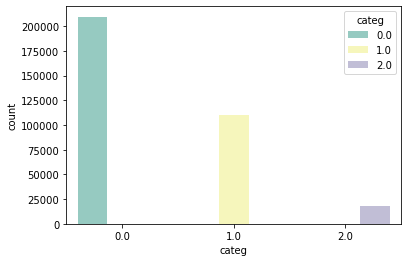

In [95]:
sns.countplot(x="categ", data=df, palette="Set3", hue="categ")
plt.savefig('categ_ca.png')

## moyenne du CA par categorie 

In [96]:
ca_categ = df[['categ','price']].groupby(by=['categ']).mean().reset_index()
ca_categ

,categ,price
0,0.0,10.646823
1,1.0,20.480106
2,2.0,75.174949


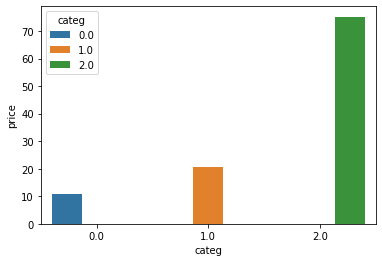

In [97]:
sns.barplot(x="categ", y="price", data=ca_categ, hue="categ")
plt.savefig('price_categ.png')

## Correlation de l'ensemble des variables

In [98]:
df.corr().head()

,price,categ,birth,age,annee,mois
price,1.000000,0.673373,0.211505,-0.211505,0.018522,-0.023020
categ,0.673373,1.000000,0.098602,-0.098602,0.054330,-0.036423
birth,0.211505,0.098602,1.000000,-1.000000,-0.007475,-0.004646
age,-0.211505,-0.098602,-1.000000,1.000000,0.007475,0.004646
annee,0.018522,0.054330,-0.007475,0.007475,1.000000,-0.651233


In [99]:
# La méthode de correctation linéaire de Pearson 

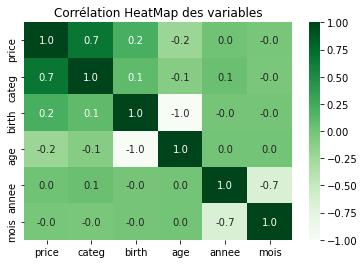

In [100]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap des variables')
plt.savefig('matrice_corr.png')
plt.show()

## Test de l'hypothèse " il existe une correlation entre le ca et l'age"

In [101]:
# Tableau de contingence "Matrice des valeurs observées"
#Variables 'ca' et 'age' du dataframe df
X = 'sex'
Y = 'categ'

# Calcul du tableau de contigence par la méthode 
c = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) 
tx = df[X].value_counts()
ty = df[Y].value_counts()

#Copie du dataframe original
cont = c.copy()
cont

categ,0.0,1.0,2.0
sex,,,
f,103846,55469,8260
m,105683,54266,9292


In [102]:
#Tableau de la "Matrice des valeurs attendues" 
#si l’hypothèse nulle était vraie.
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

#Valeurs totales observées
n = len(df)

#Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)
indep

,0.0,1.0,2.0
m,105282.69883,55138.892259,8819.408912
f,104246.30117,54596.107741,8732.591088


In [103]:
#Matrice "écart au carré normalisé de la valeur attendue
mesure = (c-indep)**2/indep
mesure

categ,0.0,1.0,2.0
f,1.537139,13.955956,25.575724
m,1.522007,13.818575,25.323958


In [104]:
#Calcul du Chi2
#Comparaison des occurrences observées (celles déjà dans le tableau) avec les occurrences attendues.
chi2 = mesure.sum().sum()
chi2

81.73335807676145

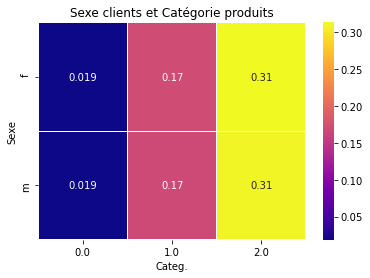

In [105]:
#Corrélation entre sexe du client et la catégorie achetée 
table = (mesure/chi2)
sns.heatmap(table, annot=True, cmap="plasma", linewidths=0.1)

plt.title('Sexe clients et Catégorie produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')

plt.show()

In [106]:
#Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(81.73335807676145, 2, 1.7857752515034613e-18)

Avec une p value (16%) inférieure au seuil de signification de 5%, une forte correlation existe entre le sexe et la catégorie de produit acheté. Ainsi, l'hypothèse nulle et rejetée et l'hypothèse alternative est maintenue. 

## Corrélation entre l'âge clients et le montant total des achats

In [107]:
# Calcul de la somme les ventes 'price'en fonction de l'âge des clients
#Création d'une variable 'age_ca'
age_ca = df.groupby('age').sum().reset_index()
age_ca = age_ca[['age', 'price']].sort_values(by='age', ascending=False) 
age_ca['price'] = age_ca['price'] / 1000 

age_ca.head()

,age,price
75,93.0,1.300030
74,92.0,2.028350
73,91.0,1.432920
72,90.0,2.586090
71,89.0,2.642656


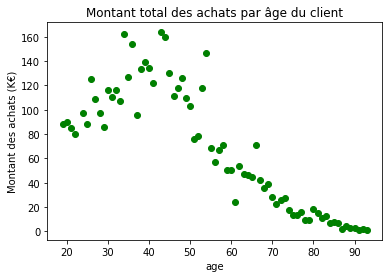

In [108]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
plt.plot(age_ca[age_ca.price < 200].age, age_ca[age_ca.price < 200].price, 'o', color='green')

plt.xlabel('age')
plt.ylabel('Montant des achats (K€)')
plt.title('Montant total des achats par âge du client')
plt.show()

In [109]:
#Coefficient de corrélation linéaire de Pearson
coef_age_ca = st.pearsonr(age_ca.age, age_ca.price)[0]
coef_age_ca

-0.7746364497494512

## Corrélation entre l'âge clients et la fréquence d'achat

In [110]:
# Nombre d'achat mensuel = la somme des des sessions clients par mois
customers_freq = df.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

#Création d'une variable fréquence 'freq'
customers_freq['freq'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,freq
75,93.0,86,0.000255
74,92.0,115,0.000341
73,91.0,84,0.000249
72,90.0,159,0.000472
71,89.0,164,0.000487
70,88.0,274,0.000814
69,87.0,144,0.000428
68,86.0,387,0.001149
67,85.0,454,0.001348
66,84.0,431,0.001280


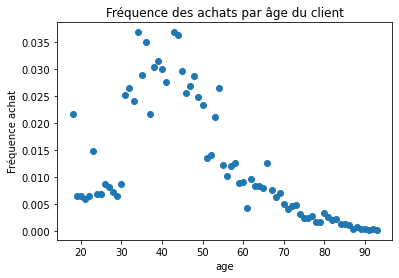

In [111]:
#Visualisation du scatterplot (fréquence d'achat mensuelle par âge)
plt.plot(customers_freq[customers_freq.freq < .05].age, customers_freq[customers_freq.freq < .05].freq, 'o')

plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats par âge du client')

plt.show()

In [112]:
#Coefficient de corrélation linéaire de Pearson
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.freq)[0]
coef_customers_freq

-0.5292577207740388

## Corrélation entre l'âge clients et la taille du panier moyen

In [113]:
# l'age du client et les sessions id 
clt_achat = df.groupby(['age', 'session_id']).count().reset_index()

#l'age client en moyenne de produits achetés 
clt_achat = clt_achat.groupby('age').mean().reset_index()
clt_achat = clt_achat[['age', 'id_prod']]
clt_achat.tail()

,age,id_prod
71,89.0,1.389831
72,90.0,1.543689
73,91.0,1.714286
74,92.0,1.597222
75,93.0,1.343750


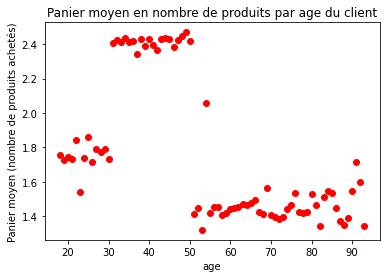

In [114]:
#Scatterplot (âge client par taille panier moyen)
plt.plot(clt_achat.age, clt_achat.id_prod, 'o', color='red')

plt.xlabel('age')
plt.ylabel('Panier moyen (nombre de produits achetés)')
plt.title('Panier moyen en nombre de produits par age du client')

plt.show()

In [115]:
#Coefficient de corrélation linéaire de Pearson
coef_clt_achat = st.pearsonr(clt_achat.age, clt_achat.id_prod)
coef_clt_achat

(-0.5808288928810568, 3.7882138463037495e-08)

## Corrélation entre l'âge clients et la catégorie produits

In [116]:
#N est égale au nombre d'observations
len(df.groupby(['age', 'categ']).count().reset_index())

227

In [117]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
1 + ((10/3) * mth.log10(227))

8.853419523977076

In [118]:
# Agrégation données clients selon l'âge et la catégorie
age_categ = df.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,18.0,0.0,1668
1,18.0,1.0,2759
2,18.0,2.0,2921
3,19.0,0.0,488
4,19.0,1.0,817


In [119]:
# Segmentation des individus 'age' (méthode cout())
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
age_categ.head(10)

,age,categ,session_id
0,"(17.925, 26.333]",0.0,5994
1,"(17.925, 26.333]",1.0,10552
2,"(17.925, 26.333]",2.0,12019
3,"(26.333, 34.667]",0.0,31712
4,"(26.333, 34.667]",1.0,12358
5,"(26.333, 34.667]",2.0,4236
6,"(34.667, 43.0]",0.0,81274
7,"(34.667, 43.0]",1.0,23879
8,"(34.667, 43.0]",2.0,280
9,"(43.0, 51.333]",0.0,52644


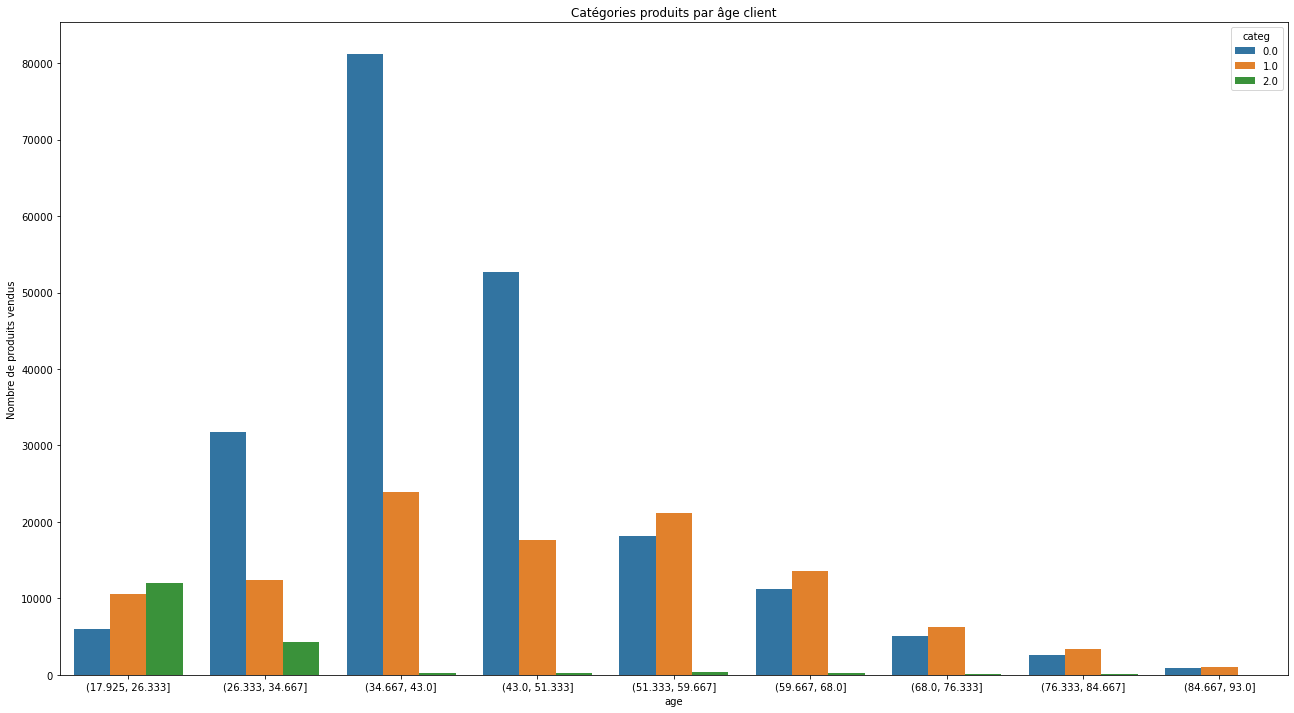

In [120]:
#BarPlot Seaborn
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits par âge client')

plt.show()

In [121]:
#Coefficient de corrélation eta carré
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

round(eta_squared(age_categ.age, age_categ.session_id), 2)


0.34

Le test de correlation a atteint la valeur 0.35 ce qui permet de confirmer le lien entre la tranche d'âge et la catégorie de produit acheté. A ce propos, le graphique en barre montre le succés de la catégorie 0 chez les clients dont la tranche d'âge est comprise entre 35 et 50 ans. 